# Investigating variation in proportion of students who finish there bachelor in time by university

- toc: true
- branch: master
- badges: true
- comments: false
- author: Tassilo Neubauer
- categories: [university]

This isn't actually meant to be read by anybody. I'll fix this once I've figured out a more efficient way to upload my plots.

In [1]:
!which python

/home/tassilo/repos/blog/_notebooks/.venv/bin/python


In [2]:
!which pip

/home/tassilo/repos/blog/_notebooks/.venv/bin/pip


In [3]:


import pip
pip.main(['install','seaborn'])

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


Defaulting to user installation because normal site-packages is not writeable

Requirement already satisfied: seaborn in /home/tassilo/.local/lib/python3.10/site-packages (0.12.2)

Requirement already satisfied: pandas>=0.25 in /home/tassilo/.local/lib/python3.10/site-packages (from seaborn) (1.5.0)

Requirement already satisfied: matplotlib!=3.6.1,>=3.1 in /home/tassilo/.local/lib/python3.10/site-packages (from seaborn) (3.5.2)

Requirement already satisfied: numpy!=1.24.0,>=1.17 in /home/tassilo/.local/lib/python3.10/site-packages (from seaborn) (1.23.1)

Requirement already satisfied: packaging>=20.0 in /usr/lib/python3/dist-packages (from matplotlib!=3.6.1,>=3.1->seaborn) (21.3)

Requirement already satisfied: cycler>=0.10 in /home/tassilo/.local/lib/python3.10/site-packages (from matplotlib!=3.6.1,>=3.1->seaborn) (0.11.0)

Requirement already satisfied: python-dateutil>=2.7 in /home/tassilo/.local/lib/python3.10/site-packages (from matplotlib!=3.6.1,>=3.1->seaborn) (2.8.2)

Requirement already satisfied: pillow>=6.2.0 in /home/tassilo/.local/lib/python3.10/site-packages (from matplotlib!=3.6.1,>=3.1->seaborn) (9.2.0)

Requirement already satisfied: kiwisolver>=1.0.1 in /home/tassilo/.local/lib/python3.10/site-packages (from matplotlib!=3.6.1,>=3.1->seaborn) (1.4.4)

Requirement already satisfied: fonttools>=4.22.0 in /home/tassilo/.local/lib/python3.10/site-packages (from matplotlib!=3.6.1,>=3.1->seaborn) (4.34.4)

Requirement already satisfied: pyparsing>=2.2.1 in /usr/lib/python3/dist-packages (from matplotlib!=3.6.1,>=3.1->seaborn) (2.4.7)

Requirement already satisfied: pytz>=2020.1 in /usr/lib/python3/dist-packages (from pandas>=0.25->seaborn) (2022.1)

Requirement already satisfied: six>=1.5 in /usr/lib/python3/dist-packages (from python-dateutil>=2.7->matplotlib!=3.6.1,>=3.1->seaborn) (1.16.0)

[notice] A new release of pip available: 22.3 -> 23.0.1
[notice] To update, run: python3 -m pip install --upgrade pip

0

In [4]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [5]:
ba2 = pd.read_csv("BA2.csv")

In [6]:
cs = pd.read_csv("cs.csv")
ba = pd.read_csv("ba.csv")

In [7]:
ba.head()

,university,students,% in Time MA,% in Time BA
0,RWTH Aachen,2010,54.4,78.5
1,Alanus HS/Alfter (priv.),260,NaN,82.7
2,Uni Augsburg - Wirtschaftswissenschaftliche Fa...,100,100.0,NaN
3,Uni Augsburg - Wirtschaftswissenschaftliche Fa...,2850,64.9,95.9
4,Uni Bamberg,2230,61.2,90.2


In [8]:
for df in [cs, ba]:
    df.rename(columns={'% in Time MA': 'ma_time',
                  '% in Time BA' : 'ba_time'}, inplace=True, errors='raise')
    df.ma_time = df.ma_time
    df.ba_time = df.ba_time

In [9]:
cs.head()

,university,students,ma_time,ba_time,Nc (2019?)
0,RWTH Aachen,4420,35.5,60.3,2.6
1,Uni Augsburg,1720,49.4,64.0,NaN
2,Uni Bamberg,940,37.1,86.7,3.1
3,Uni Bayreuth,750,NaN,60.5,NaN
4,FU Berlin,1770,22.9,33.7,1.8


In [10]:
ba.head()

,university,students,ma_time,ba_time
0,RWTH Aachen,2010,54.4,78.5
1,Alanus HS/Alfter (priv.),260,NaN,82.7
2,Uni Augsburg - Wirtschaftswissenschaftliche Fa...,100,100.0,NaN
3,Uni Augsburg - Wirtschaftswissenschaftliche Fa...,2850,64.9,95.9
4,Uni Bamberg,2230,61.2,90.2


In [11]:
cs = cs.set_index('university')
ba = ba.set_index('university')

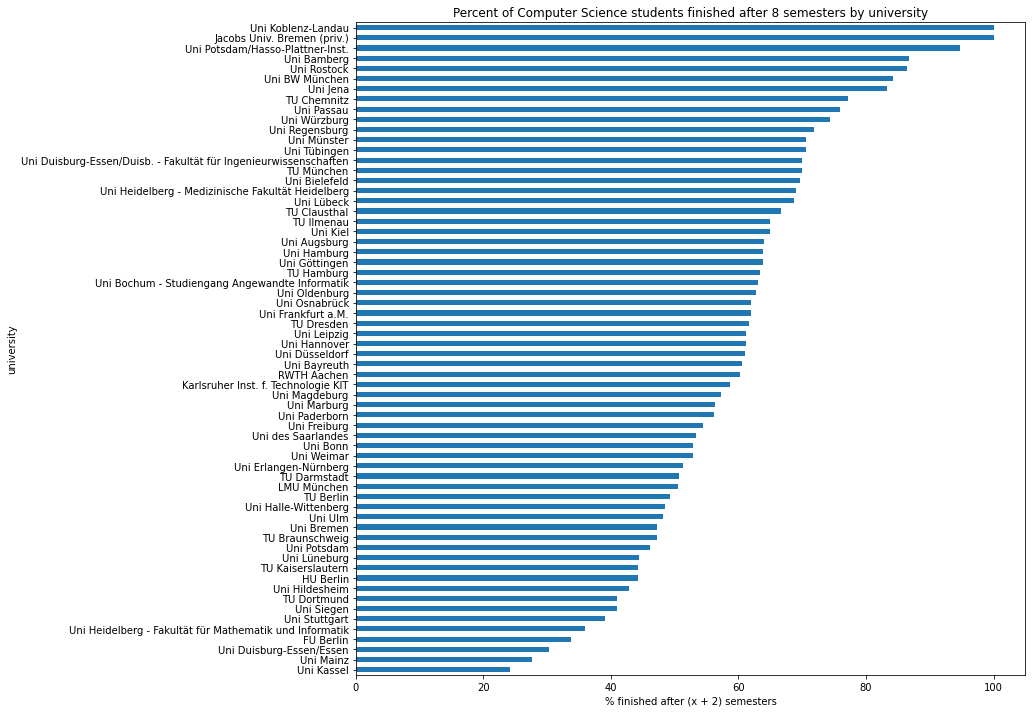

In [12]:
cs_sorted = cs[cs.ba_time > 0].sort_values('ba_time', axis=0)
cs_sorted.ba_time.plot.barh(figsize=(12,12))
plt.title("Percent of Computer Science students finished after 8 semesters by university")
plt.xlabel("% finished after (x + 2) semesters")
plt.savefig("cs_ba_time.png")

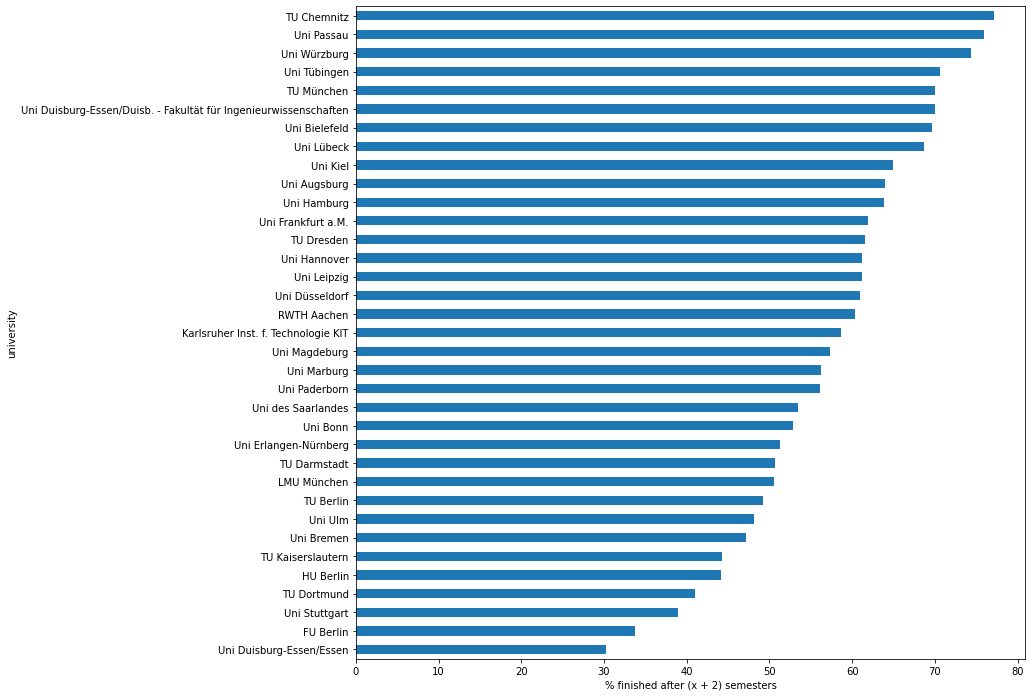

In [13]:
cs_sorted = cs[cs['students'] > 1000].sort_values('ba_time', axis=0)
cs_sorted.ba_time.plot.barh(figsize=(12,12))
plt.xlabel("% finished after (x + 2) semesters")
plt.savefig("cs_sorted_ba_time.png")

The only thing that strikes me as different from the plot on CS students, is the number of private schools and that they are doing pretty well on this metric. This makes sense to me as the schools as well as students have stronger incentives to make the student graduate early

To get some comparisons I also looked at business administration students as it is the most popular subject in Germany. Thus classes should be big enough that I shouldn't have to worry about statistical significance too much

/tmp/ipykernel_1311097/407855156.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ba_sorted = ba[ba['students'] > 1000][ba['ba_time']>0].sort_values('ba_time', axis=0)


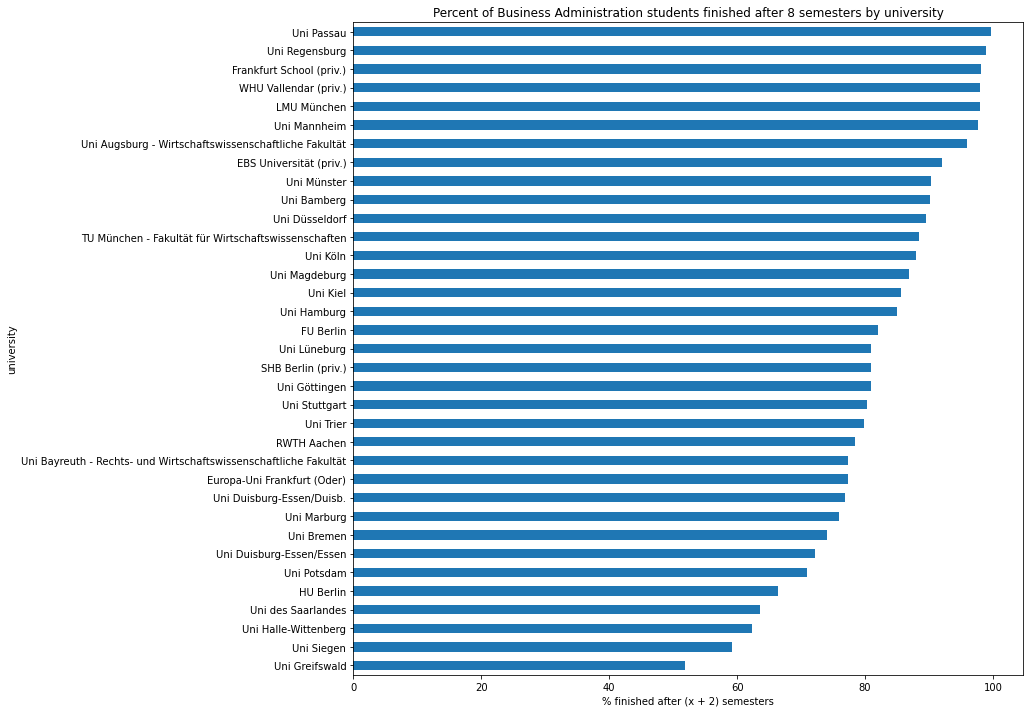

In [14]:
ba_sorted = ba[ba['students'] > 1000][ba['ba_time']>0].sort_values('ba_time', axis=0)
ba_sorted.ba_time.plot.barh(figsize=(12,12))
plt.xlabel("% finished after (x + 2) semesters")
plt.title("Percent of Business Administration students finished after 8 semesters by university")
plt.savefig("ba_sorted_ba_time.png")

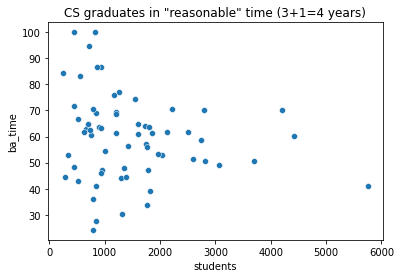

In [15]:
sns.scatterplot(x=cs.students, y=cs.ba_time)
plt.title('CS graduates in "reasonable" time (3+1=4 years)')
plt.savefig("ba_cs_scatter.png")

Not sure how to interpret this. It makes sense that there is more variation for smaller universities and I think it makes it slightly more likely a lot of this can be explained through a combination of selection effects and variation in student ability.

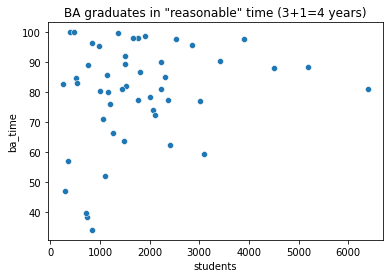

In [16]:
sns.scatterplot(x=ba.students, y=ba.ba_time)
plt.title('BA graduates in "reasonable" time (3+1=4 years)')
plt.savefig("ba_ba_scatter.png")

Looking at relationship between length bachelor and master

<AxesSubplot:xlabel='ba_time', ylabel='ma_time'>

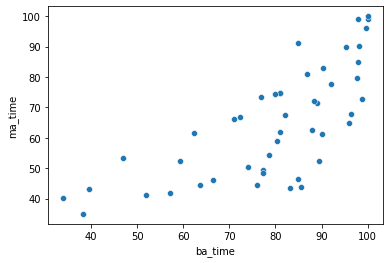

In [17]:
sns.scatterplot(x=ba.ba_time, y=ba.ma_time)

<AxesSubplot:xlabel='ba_time', ylabel='ma_time'>

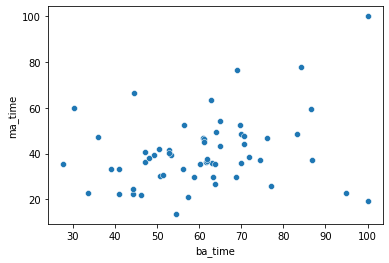

In [18]:
sns.scatterplot(x=cs.ba_time, y=cs.ma_time)

<AxesSubplot:xlabel='ba_time', ylabel='ba_time'>

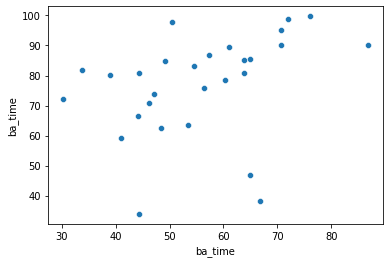

In [19]:
sns.scatterplot(x=cs.ba_time, y=ba.ba_time)

So with so few datapoints

In [20]:
ba2.head()

,university,overall,support 1,support2,exams,support3
0,RWTH Aachen,1.6,0.857143,1.9,1.8,1.8
1,Uni Augsburg,NaN,0.714286,NaN,NaN,NaN
2,Uni Bamberg,1.7,0.785714,1.9,2.0,1.8
3,Uni Bayreuth,NaN,0.785714,NaN,2.5,2.6
4,FU Berlin,2.3,0.785714,2.4,2.2,2.1


In [21]:
ba2 = ba2.merge(ba, on="university")

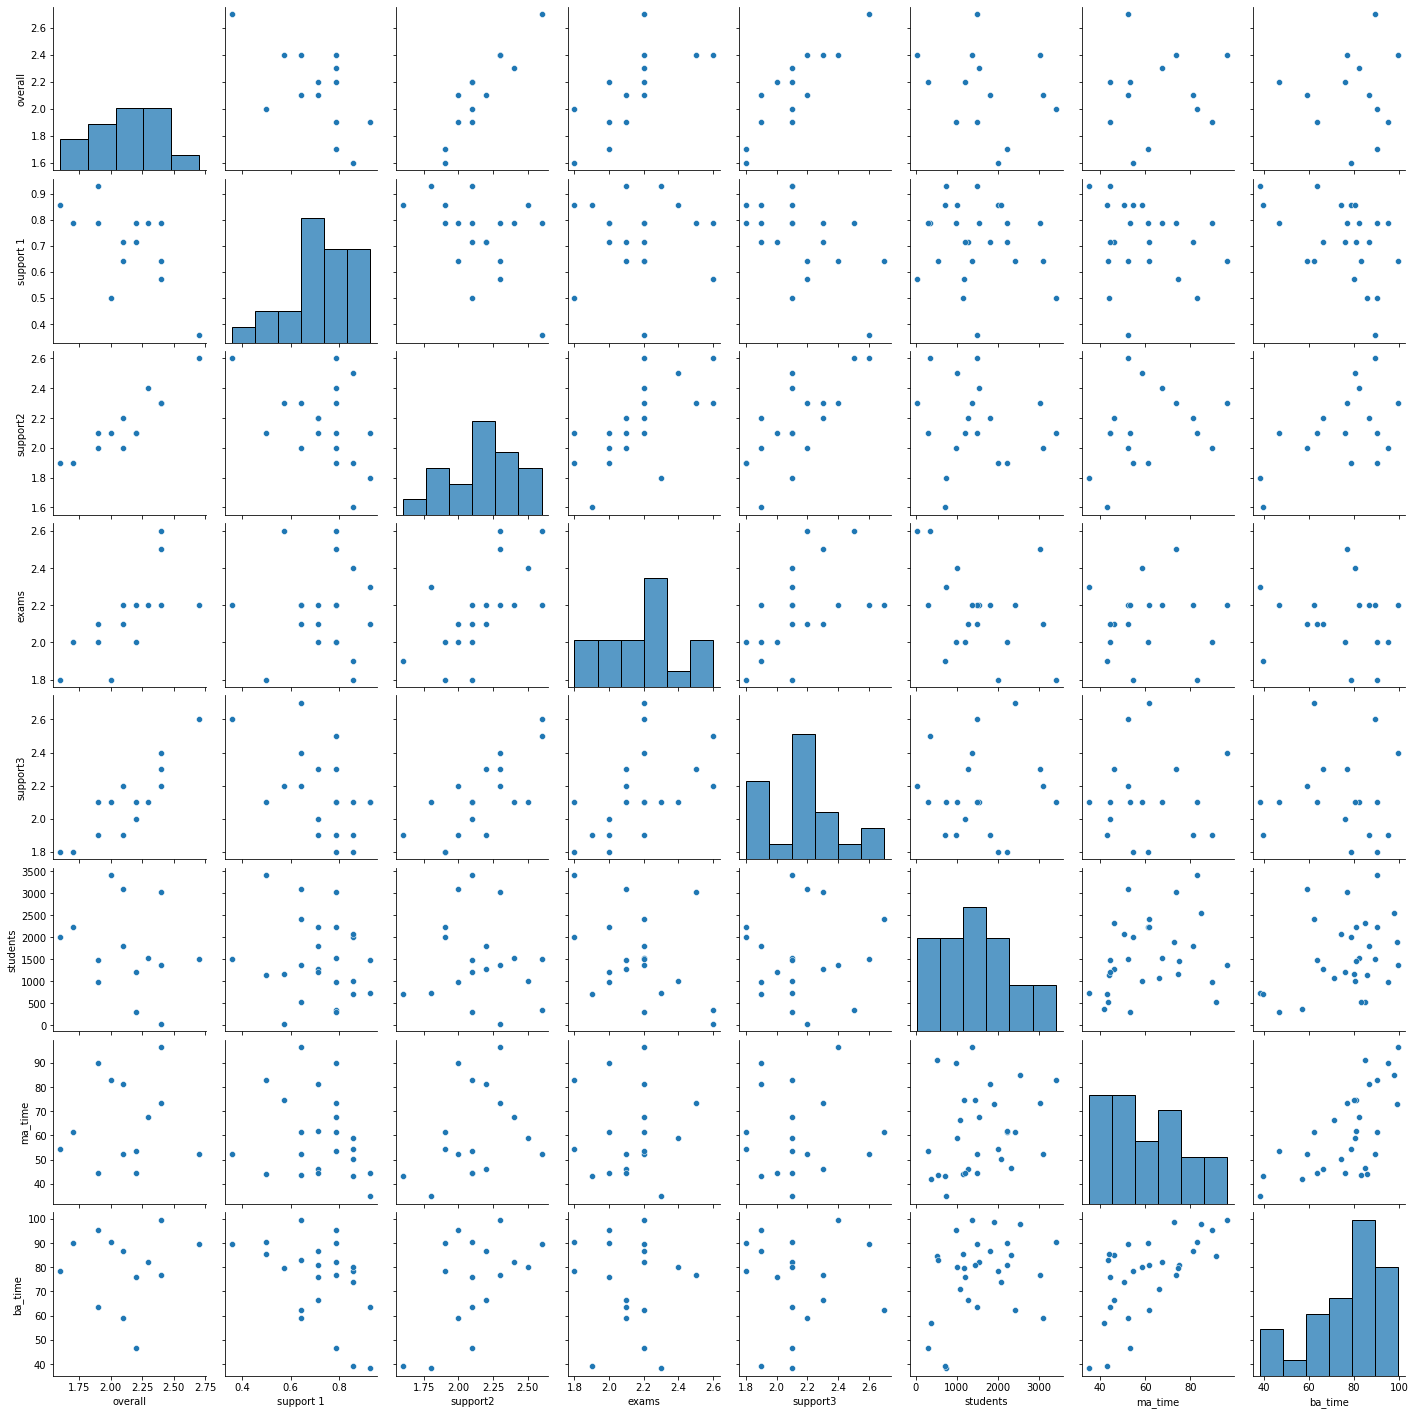

In [22]:
sns.pairplot(ba2)

In [23]:
ba2.corr(numeric_only=True)

,overall,support 1,support2,exams,support3,students,ma_time,ba_time
overall,1.000000,-0.623540,0.913608,0.688712,0.876608,-0.233796,0.090057,0.059519
support 1,-0.623540,1.000000,-0.428131,-0.005739,-0.509308,-0.136898,-0.227488,-0.466941
support2,0.913608,-0.428131,1.000000,0.634814,0.723527,-0.105324,0.312464,0.545622
exams,0.688712,-0.005739,0.634814,1.000000,0.511413,-0.387469,0.025604,-0.081629
support3,0.876608,-0.509308,0.723527,0.511413,1.000000,0.033213,0.034096,0.001501
students,-0.233796,-0.136898,-0.105324,-0.387469,0.033213,1.000000,0.249460,0.326472
ma_time,0.090057,-0.227488,0.312464,0.025604,0.034096,0.249460,1.000000,0.650647
ba_time,0.059519,-0.466941,0.545622,-0.081629,0.001501,0.326472,0.650647,1.000000


In [73]:
!pip install causal-learn

In [29]:
import pip
pip.main(['install','causal-learn'])

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


Defaulting to user installation because normal site-packages is not writeable

Collecting causal-learn

Using cached causal_learn-0.1.3.3-py3-none-any.whl (172 kB)

Requirement already satisfied: matplotlib in /home/tassilo/.local/lib/python3.10/site-packages (from causal-learn) (3.5.2)

Collecting graphviz

Using cached graphviz-0.20.1-py3-none-any.whl (47 kB)

Collecting statsmodels

Using cached statsmodels-0.13.5-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (9.9 MB)

Collecting scikit-learn

Using cached scikit_learn-1.2.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (9.6 MB)

Requirement already satisfied: scipy in /home/tassilo/.local/lib/python3.10/site-packages (from causal-learn) (1.10.0)

Collecting pydot

Using cached pydot-1.4.2-py2.py3-none-any.whl (21 kB)

Requirement already satisfied: pandas in /home/tassilo/.local/lib/python3.10/site-packages (from causal-learn) (1.5.0)

Requirement already satisfied: numpy in /home/tassilo/.local/lib/python3.10/site-packages (from causal-learn) (1.23.1)

Collecting tqdm

Using cached tqdm-4.65.0-py3-none-any.whl (77 kB)

Requirement already satisfied: networkx in /home/tassilo/.local/lib/python3.10/site-packages (from causal-learn) (3.0)

Requirement already satisfied: packaging>=20.0 in /usr/lib/python3/dist-packages (from matplotlib->causal-learn) (21.3)

Requirement already satisfied: cycler>=0.10 in /home/tassilo/.local/lib/python3.10/site-packages (from matplotlib->causal-learn) (0.11.0)

Requirement already satisfied: python-dateutil>=2.7 in /home/tassilo/.local/lib/python3.10/site-packages (from matplotlib->causal-learn) (2.8.2)

Requirement already satisfied: pillow>=6.2.0 in /home/tassilo/.local/lib/python3.10/site-packages (from matplotlib->causal-learn) (9.2.0)

Requirement already satisfied: kiwisolver>=1.0.1 in /home/tassilo/.local/lib/python3.10/site-packages (from matplotlib->causal-learn) (1.4.4)

Requirement already satisfied: fonttools>=4.22.0 in /home/tassilo/.local/lib/python3.10/site-packages (from matplotlib->causal-learn) (4.34.4)

Requirement already satisfied: pyparsing>=2.2.1 in /usr/lib/python3/dist-packages (from matplotlib->causal-learn) (2.4.7)

Requirement already satisfied: pytz>=2020.1 in /usr/lib/python3/dist-packages (from pandas->causal-learn) (2022.1)

Collecting joblib>=1.1.1

Using cached joblib-1.2.0-py3-none-any.whl (297 kB)

Collecting threadpoolctl>=2.0.0

Using cached threadpoolctl-3.1.0-py3-none-any.whl (14 kB)

Collecting patsy>=0.5.2

Using cached patsy-0.5.3-py2.py3-none-any.whl (233 kB)

Requirement already satisfied: six in /usr/lib/python3/dist-packages (from patsy>=0.5.2->statsmodels->causal-learn) (1.16.0)

Installing collected packages: tqdm, threadpoolctl, pydot, patsy, joblib, graphviz, scikit-learn, statsmodels, causal-learn

Successfully installed causal-learn-0.1.3.3 graphviz-0.20.1 joblib-1.2.0 patsy-0.5.3 pydot-1.4.2 scikit-learn-1.2.2 statsmodels-0.13.5 threadpoolctl-3.1.0 tqdm-4.65.0

[notice] A new release of pip available: 22.3 -> 23.0.1
[notice] To update, run: python3 -m pip install --upgrade pip

0

In [27]:
help(pip)

Help on package pip:

NAME
    pip

PACKAGE CONTENTS
    __main__
    __pip-runner__
    _internal (package)
    _vendor (package)

FUNCTIONS
    main(args: Optional[List[str]] = None) -> int
        This is an internal API only meant for use by pip's own console scripts.
        
        For additional details, see https://github.com/pypa/pip/issues/7498.

DATA
    List = typing.List
        A generic version of list.
    
    Optional = typing.Optional
        Optional type.
        
        Optional[X] is equivalent to Union[X, None].

VERSION
    22.3

FILE
    /home/tassilo/.local/lib/python3.10/site-packages/pip/__init__.py




In [ ]:
#to array

In [31]:
data = ba2.values

In [55]:
data = ba2.drop('university', axis = 1).fillna(value=0)

In [56]:
data = data.dropna().to_numpy()

In [57]:
data

array([[1.60000000e+00, 8.57142857e-01, 1.90000000e+00, 1.80000000e+00,
        1.80000000e+00, 2.01000000e+03, 5.44000000e+01, 7.85000000e+01],
       [1.70000000e+00, 7.85714286e-01, 1.90000000e+00, 2.00000000e+00,
        1.80000000e+00, 2.23000000e+03, 6.12000000e+01, 9.02000000e+01],
       [2.30000000e+00, 7.85714286e-01, 2.40000000e+00, 2.20000000e+00,
        2.10000000e+00, 1.53000000e+03, 6.75000000e+01, 8.20000000e+01],
       [0.00000000e+00, 7.14285714e-01, 2.20000000e+00, 2.10000000e+00,
        2.30000000e+00, 1.27000000e+03, 4.60000000e+01, 6.64000000e+01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 5.20000000e+02, 9.13000000e+01, 8.48000000e+01],
       [0.00000000e+00, 7.85714286e-01, 2.60000000e+00, 2.60000000e+00,
        2.50000000e+00, 3.50000000e+02, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 8.57142857e-01, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 2.07000000e+03, 5.04000000e+01, 7.

Depth=1, working on node 7: 100%|████████████████| 8/8 [00:00<00:00, 198.17it/s]


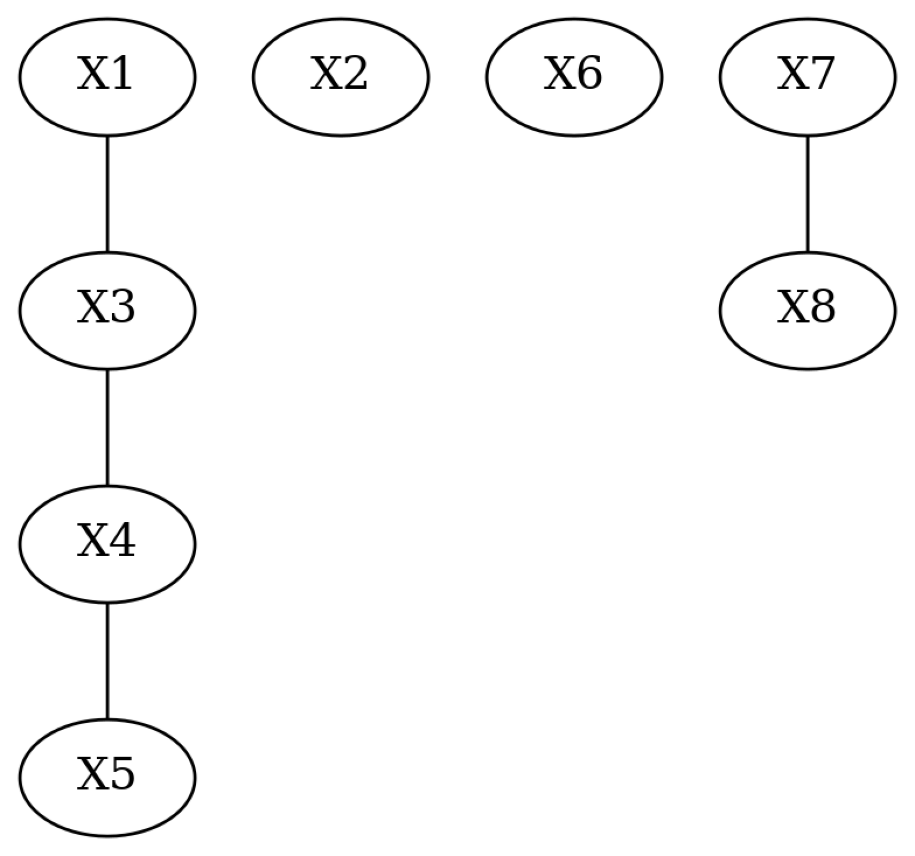

In [59]:
from causallearn.search.ConstraintBased.PC import pc
cg = pc(data,show_progress=True)

cg.draw_pydot_graph()
from causallearn.utils.GraphUtils import GraphUtils

pyd = GraphUtils.to_pydot(cg.G)
pyd.write_png('simple_test.png')


In [67]:
amphi = pd.read_csv("amphibiens.csv",delimiter=";")

In [72]:
amp = amphi.drop(["ID", "Motorway"], axis=1).dropna().to_numpy()

In [75]:
amp

array([[600,   1,   1, ...,   0,   0,   0],
       [700,   1,   5, ...,   0,   1,   0],
       [200,   1,   5, ...,   0,   1,   0],
       ...,
       [500,   1,   1, ...,   0,   1,   0],
       [300,   1,  12, ...,   0,   0,   0],
       [300,   1,  12, ...,   0,   0,   0]])

Depth=2, working on node 20: 100%|████████████████████████████| 21/21 [00:00<00:00, 824.11it/s]


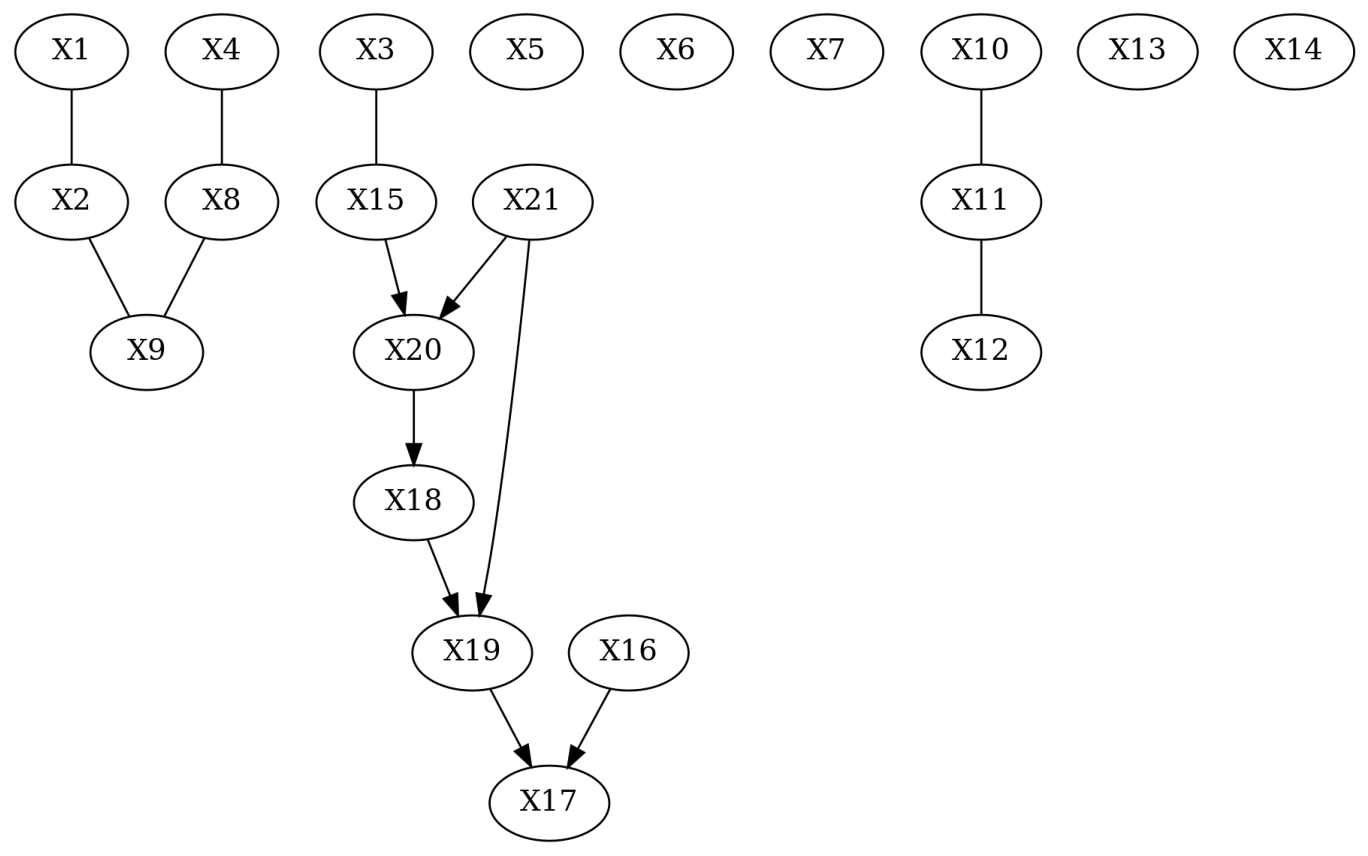

In [74]:
from causallearn.search.ConstraintBased.PC import pc
cg = pc(amp,0.01)

cg.draw_pydot_graph()
from causallearn.utils.GraphUtils import GraphUtils

pyd = GraphUtils.to_pydot(cg.G)
pyd.write_png('simple_test.png')


In [51]:
ba2.head()

,university,overall,support 1,support2,exams,support3,students,ma_time,ba_time
0,RWTH Aachen,1.6,0.857143,1.9,1.8,1.8,2010,54.4,78.5
1,Uni Bamberg,1.7,0.785714,1.9,2.0,1.8,2230,61.2,90.2
2,FU Berlin,2.3,0.785714,2.4,2.2,2.1,1530,67.5,82.0
3,HU Berlin,NaN,0.714286,2.2,2.1,2.3,1270,46.0,66.4
4,TU Berlin,NaN,NaN,NaN,NaN,NaN,520,91.3,84.8


In [68]:
import dowhy
from dowhy import CausalModel
import pandas as pd
import numpy as np

ModuleNotFoundError: No module named 'dowhy'

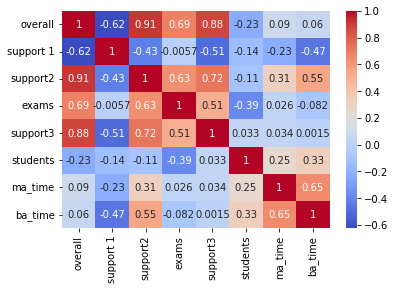

In [66]:
sns.heatmap(ba2.corr(numeric_only=True),annot=True, cmap='coolwarm')
plt.show()